### PREGUNTA 1

Considere las siguientes variables aleatorias  
1. $X ∼ b(x; n, p)$. Seleccione valores para $n, p$.
2. $Y ∼ exp(x; λ)$. Seleccione un valor para  $λ$.
        
Para cada variable aleatoria genere una muestra aleatoria de tamaño 150 y realizar el siguiente procedimiento:
        
1.  Construir, según el caso, un histograma de masa o densidad y, en un mismo
        gráfico, compararlo con la función de probabilidad teórica.
2.  Calcular el promedio, los cuartiles y la desviación estándar. Comparar los
        valores obtenidos con los valores teóricos.

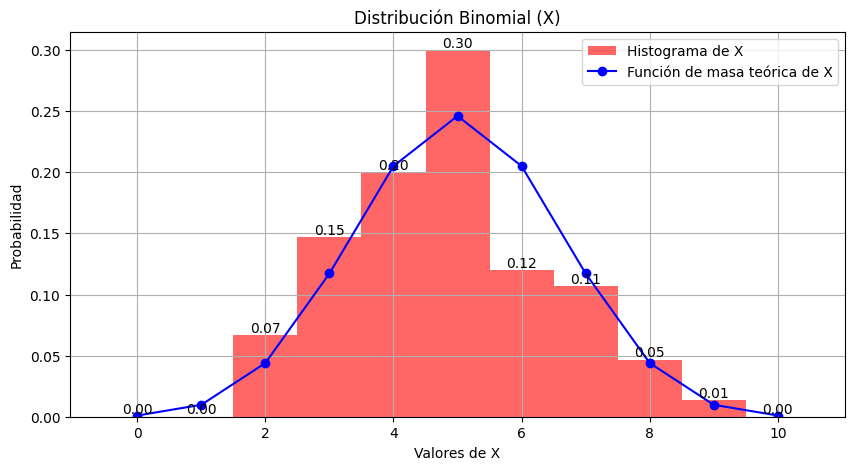

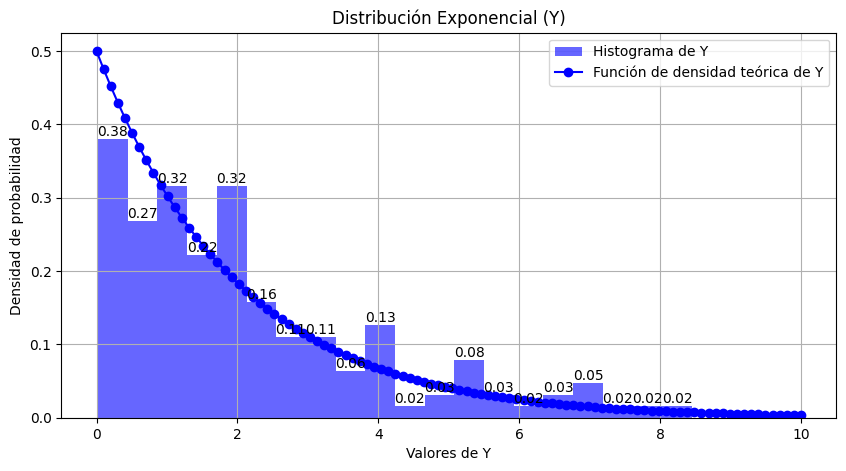

+------------------------------------+---------+
| Estadísticas descriptivas para X   |   Valor |
+====================================+=========+
| Promedio                           | 5.11333 |
+------------------------------------+---------+
| Cuartil 1                          | 4       |
+------------------------------------+---------+
| Cuartil 2 (Mediana)                | 5       |
+------------------------------------+---------+
| Cuartil 3                          | 6       |
+------------------------------------+---------+
| Desviación estándar                | 1.5255  |
+------------------------------------+---------+


+------------------------------------+----------+
| Estadísticas descriptivas para Y   |    Valor |
+====================================+==========+
| Promedio                           | 2.05246  |
+------------------------------------+----------+
| Cuartil 1                          | 0.430883 |
+------------------------------------+----------+
| Cuartil 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, expon
from tabulate import tabulate

def distribucion_binomial_histograma(n, p, sample_size=150):
    """
    Genera un histograma y la función de masa de probabilidad teórica para una distribución binomial.

    Parámetros:
    n (int): El número de ensayos.
    p (float): La probabilidad de éxito en cada ensayo.
    sample_size (int, opcional): El tamaño de la muestra aleatoria. Por defecto es 150.

    """
    # Generar muestras aleatorias para X (distribución binomial)
    X_samples = np.random.binomial(n, p, sample_size)

    # Histograma y función de masa de X
    plt.figure(figsize=(10, 5))
    plt.hist(X_samples, bins=np.arange(n+2)-0.5, density=True, alpha=0.6, label='Histograma de X', color='red')
    x_values = np.arange(0, n+1)
    plt.plot(x_values, binom.pmf(x_values, n, p), 'bo-', label='Función de masa teórica de X')
    plt.xlabel('Valores de X')
    plt.ylabel('Probabilidad')
    plt.title('Distribución Binomial (X)')
    plt.legend()
        
    # Agregar valores de las barras
    for i, rect in enumerate(plt.gca().patches):
        plt.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), '{:.2f}'.format(rect.get_height()), ha='center', va='bottom', color='black')
    
    plt.grid(True)
    plt.show()

def distribucion_exponencial_histograma(lambda_param, sample_size=150):
    """
    Genera un histograma y la función de densidad de probabilidad teórica para una distribución exponencial.

    Parámetros:
    lambda_param (float): Parámetro de tasa lambda de la distribución exponencial.
    sample_size (int, opcional): El tamaño de la muestra aleatoria. Por defecto es 150.

    """
    # Generar muestras aleatorias para Y (distribución exponencial)
    Y_samples = np.random.exponential(scale=1/lambda_param, size=sample_size)

    # Histograma y función de densidad de Y
    plt.figure(figsize=(10, 5))
    plt.hist(Y_samples, bins=20, density=True, alpha=0.6, label='Histograma de Y', color='blue')
    y_values = np.linspace(0, 10, 100)
    plt.plot(y_values, expon.pdf(y_values, scale=1/lambda_param), 'bo-', label='Función de densidad teórica de Y')
    plt.xlabel('Valores de Y')
    plt.ylabel('Densidad de probabilidad')
    plt.title('Distribución Exponencial (Y)')
    plt.legend()
    
    # Agregar valores de las barras
    for i, rect in enumerate(plt.gca().patches):
        plt.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), '{:.2f}'.format(rect.get_height()), ha='center', va='bottom', color='black')

    plt.grid(True)
    plt.show()

def estadisticas_descriptivas(muestras, nombre):
    """
    Calcula estadísticas descriptivas para las muestras.

    Parámetros:
    muestras (array): Array de muestras para calcular las estadísticas descriptivas.
    nombre (str, opcional): El nombre de la distribución. Por defecto es "X".

    """
    mean = np.mean(muestras)
    q1, q2, q3 = np.percentile(muestras, [25, 50, 75])
    std = np.std(muestras)

    # Organizar los datos en una lista de listas para tabulate
    data = [
        ["Promedio", mean],
        ["Cuartil 1", q1],
        ["Cuartil 2 (Mediana)", q2],
        ["Cuartil 3", q3],
        ["Desviación estándar", std]
    ]

    # Crear la tabla
    table = tabulate(data, headers=[f"Estadísticas descriptivas para {nombre}", "Valor"], tablefmt="grid")

    return table

# Parámetros para la distribución binomial
n = 10  # Valor para n
p = 0.5  # Valor para p

# Función Binomial
distribucion_binomial_histograma(n, p)

# Parámetro para la distribución exponencial
lambda_param = 0.5  # Valor para lambda

# Función Exponencial
distribucion_exponencial_histograma(lambda_param)

# Calcular estadísticas descriptivas para X
X_samples = np.random.binomial(n, p, 150)
tabla = estadisticas_descriptivas(X_samples, "X")
print(tabla)
print("\n")

# Calcular estadísticas descriptivas para Y
Y_samples = np.random.exponential(scale=1/lambda_param, size=150)
tabla =estadisticas_descriptivas(Y_samples, "Y")
print(tabla)
